<a href="https://colab.research.google.com/github/88888888github/noval-ai/blob/main/%E2%80%9CnovelAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

本笔记由此改写而成: 

https://colab.research.google.com/drive/1kw3egmSn-KgWsikYvOMjJkVDsPLjEMzl
https://colab.research.google.com/drive/1AfAmwLMd_Vx33O9IwY2TmO9wKZ8ABRRa

感谢大佬们的贡献

In [ ]:
#@title 杀掉colab进程，会使页面报错，但是不用担心，继续运行即可，请勿跳过
import os
os.kill(os.getpid(), 9)

In [ ]:
#@title 加载Google云端硬盘
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. 克隆git仓库

11月1日追记：由于AUTOMATIC1111大佬更新非常频繁，有时会出现Bug导致无法运行，所以本笔记固定使用11月1日的版本，以免因后续更新出现问题无法使用。

如果想使用最新版本，可以使用下方单元格中的第二行代码。

In [ ]:
#!git clone https://github.com/alphanemeless/stable-diffusion-webui.git -b static_branch #11月1日版本
!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui.git #github最新版本
%cd stable-diffusion-webui

fatal: destination path 'stable-diffusion-webui' already exists and is not an empty directory.
/content/stable-diffusion-webui


# 2. 安装依赖

In [ ]:
!COMMANDLINE_ARGS="--exit" REQS_FILE="requirements.txt" python launch.py

Python 3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]
Commit hash: 198a1ffcfc963a3d74674fad560e87dbebf7949f
Installing requirements for Web UI
Exiting because of --exit argument


# 3. 下载full模型，以下两种方式二选一
#建议用云盘复制版，自己上传full模型。
#若使用Gdown下载，人数太多之后文件容易被BAN

使用云盘复制版时，请严格按照以下步骤将模型文件上传到谷歌云盘：

1.进入谷歌云盘 https://drive.google.com/drive/my-drive 找到云盘根目录

2.在根目录下创建文件夹，并命名为：stableckpt

3.从泄露模型的磁链中下载需要的文件，如下图所示，下载animefull-final-pruned文件夹，modules文件夹，以及animevae.pt这个文件，下载好后，请保持原样，不要改动文件夹内部的路径格式，否则在复制时会因为路径报错

4.将第三部步下载好的所有文件，全部上传到第二步中创建好的stableckpt文件夹内，等待成功上传即可。

（P.S. 成功上传后，文件将长期储存在谷歌云盘中，再次使用时，就可以省略该步）

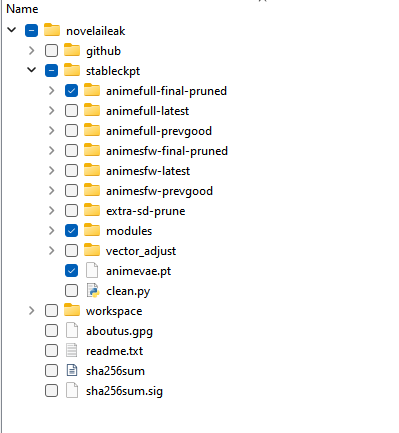

**11月1日更新：**

追加一种不需要手动上传的方式

你可以直接转存谷歌云盘的文件：[点此查看文件](https://drive.google.com/drive/folders/1-S67FZIlny_hkyEETT5eoKnzsS0D_K2P)

由于谷歌云盘无法直接复制文件夹，只能对文件进行复制，你需要做以下操作：

1.进入分享文件夹的内部，对所有的单个文件单击右键复制，文件会在你自己的云盘根目录下生成后缀带有 （副本） 字样的文件。

2.将复制到你云盘根目录下的文件进行重命名，右键单击，选择重命名，将（副本）这个后缀删除掉，文件名与共享文件夹内的文件保持一致。

3.在根目录下手动创建目录，目录的路径格式需完全与共享文件夹相同。

4.右键单击重命名好的文件，选择移动，将它们移动至创建好的目录下，最后文件夹中的内容和共享文件夹完全相同，则转存成功。

（备注：直接对文件夹添加快捷方式到云端硬盘，并没有真正将文件复制到你的云盘中，如果共享链接失效，您将无法继续使用，所以不推荐用创建快捷方式来转存）

# 下面两种方式，请二选一，只执行一种

In [ ]:
#@title 云盘复制版(推荐使用，需先进行文件上传)

!cp /content/drive/MyDrive/stableckpt/animefull-final-pruned/model.ckpt /content/stable-diffusion-webui/models/Stable-diffusion/final-pruned.ckpt
!cp /content/drive/MyDrive/stableckpt/animevae.pt /content/stable-diffusion-webui/models/Stable-diffusion/final-pruned.vae.pt
!mkdir /content/stable-diffusion-webui/models/hypernetworks
!cp -r /content/drive/MyDrive/stableckpt/modules/modules/* /content/stable-diffusion-webui/models/hypernetworks
!rm /content/stable-diffusion-webui/repositories/stable-diffusion/configs/stable-diffusion/v1-inference.yaml
!cp /content/drive/MyDrive/stableckpt/animefull-final-pruned/config.yaml /content/stable-diffusion-webui/repositories/stable-diffusion/configs/stable-diffusion/v1-inference.yaml

mkdir: cannot create directory ‘/content/stable-diffusion-webui/models/hypernetworks’: File exists


In [ ]:
#@title Gdown下载版(使用人数过多，会导致文件被冻，不建议使用）
!gdown --id '1kJ2lCJ56_R342dQVzHfcvKdyq9HXIxQe' --output /content/stable-diffusion-webui/models/Stable-diffusion/final-pruned.ckpt
!gdown --id '1cZoN_PTmdOidDeVlj_B8kG99TvQZ2I0O' --output /content/stable-diffusion-webui/models/Stable-diffusion/final-pruned.vae.pt
!mkdir /content/temps
!gdown --id '1V7gSylOF9W_03CPap70etPUYKBmtkVi2' --output /content/temps/modules.zip
!unzip /content/temps/modules.zip -d /content/temps
!mkdir /content/stable-diffusion-webui/models/hypernetworks
!cp -r /content/temps/modules/* /content/stable-diffusion-webui/models/hypernetworks
#config
!rm /content/stable-diffusion-webui/repositories/stable-diffusion/configs/stable-diffusion/v1-inference.yaml
!gdown --id '1C1swqS024tgXK_JWr40d4_F3LYVW7W4F' --output /content/stable-diffusion-webui/repositories/stable-diffusion/configs/stable-diffusion/v1-inference.yaml


/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1kJ2lCJ56_R342dQVzHfcvKdyq9HXIxQe 

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive

# 4. 部署模型到gradio
使用web ui. 你将会得到一个类似 xxx.gradio.app，点击它就可以进入部署好的页面.

命令行参数如下:
  - `--share` - 创建一个在线的 gradio.app 链接
  - `--gradio-debug` - 打印输出到控制台
  - `--gradio-auth me:qwerty` - 创建用户，默认 username 为 me, password 为 qwerty，可以自行修改，用作登陆
  - `--deepdanbooru` - 用于安装deepdanbooru，方便使用图片获取prompt

**10月13日追记：为了避免别人爬取你的线上部署来使用，强烈建议修改用户名与密码，请将me和qwerty替换成其他的。**

**10月19日更新：增加了Deepdanbooru的支持，第一次使用时需要下载一些组件，比较慢，请耐心等待。没有使用需要的用户可以删除--deepdanbooru命令，来减少代码量**

In [ ]:
!COMMANDLINE_ARGS="--deepdanbooru --share --gradio-debug --gradio-auth me:qwqer999999999" REQS_FILE="requirements.txt" python launch.py

Python 3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]
Commit hash: 198a1ffcfc963a3d74674fad560e87dbebf7949f
Installing requirements for Web UI
Launching Web UI with arguments: --deepdanbooru --share --gradio-debug --gradio-auth me:qwqer999999999
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 64, 64) = 16384 dimensions.
making attention of type 'vanilla' with 512 in_channels
Downloading: 100% 939k/939k [00:00<00:00, 1.86MB/s]
Downloading: 100% 512k/512k [00:00<00:00, 1.23MB/s]
Downloading: 100% 389/389 [00:00<00:00, 329kB/s]
Downloading: 100% 905/905 [00:00<00:00, 722kB/s]
Downloading: 100% 4.41k/4.41k [00:00<00:00, 1.94MB/s]
Downloading: 100% 1.59G/1.59G [00:23<00:00, 72.6MB/s]
Loading weights [925997e9] from /content/stable-diffusion-webui/models/Stable-diffusion/final-pruned.ckpt
Loading VAE weights from: /content/stable-diffusion-webui/models/Stable-dif

# 5.如何让你的出图效果更好（11月1日更新）
你可以使用著名的明日香检测来判断你的设置是否与官网效果接近：

https://github.com/AUTOMATIC1111/stable-diffusion-webui/discussions/2017

你可以参考以下设置：

1.step设置为 28

2.CFG scales设置为 12

3.在setting里把Stop At last layers of CLIP model设置为 2，然后点击Apply settings（非常重要）

4.使用明日香来检查你的设置是否正确：

seed：2870305590

Sampler: Euler

Size: 512x512

Model hash: 925997e9

```
用以下参数生成图片：
masterpiece, best quality, masterpiece, asuka langley sitting cross legged on a chair
Negative prompt : lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts,signature, watermark, username, blurry, artist name
// Steps: 28, Sampler: Euler, CFG scale: 12, Seed: 2870305590, Size: 512x512, Model hash: 925997e9, Clip skip: 2
```


如果得到的
[明日香图片](https://user-images.githubusercontent.com/41844714/194774793-9f034a02-21c8-4d59-a570-d79b5076e1cd.png)与链接中的一样，则检查通过：